In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
%matplotlib inline

In [89]:
sns.set_style("whitegrid")

In [91]:
df = pd.read_csv("C:/Users/yashu/Downloads/Telegram Desktop/25_Projects/ML/Fraud Detection Using ML/payment_fraud.csv")

In [93]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


In [95]:
df.label.value_counts(dropna=False)

label
0    38661
1      560
Name: count, dtype: int64

In [97]:
df.isna().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

paymentMethod
creditcard     28004
paypal          9303
storecredit     1914
Name: count, dtype: int64


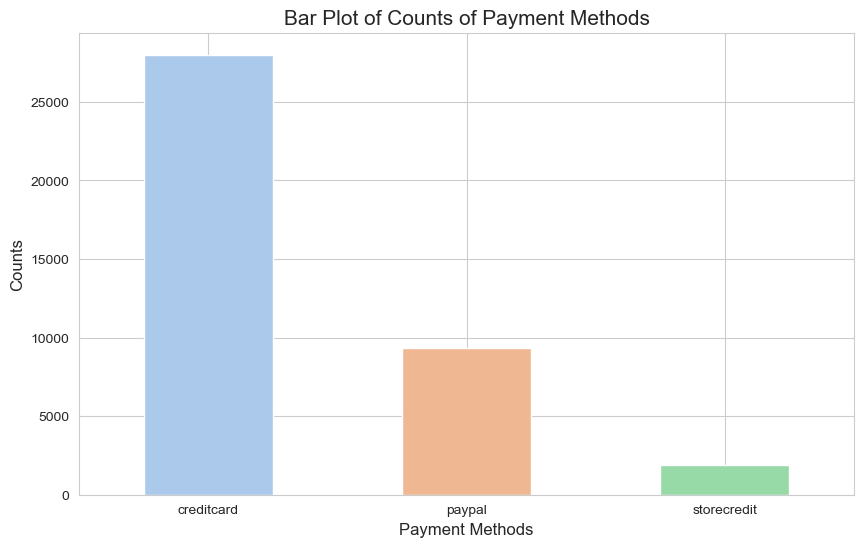

In [99]:
#bar plot for payment method
paymthd = df.paymentMethod.value_counts(dropna=False)
print(paymthd)
plt.figure(figsize=(10,6))
sns.barplot(x=paymthd.index , y=paymthd.values ,hue = paymthd.index, legend=False, palette="pastel" , width=0.5)
plt.title(label="Bar Plot of Counts of Payment Methods",fontsize=15)
plt.xlabel(xlabel=("Payment Methods"),fontsize=12)
plt.ylabel(ylabel=("Counts"),fontsize=12)
plt.grid(True, linestyle='-', alpha=1)
plt.show()

In [103]:
#coverting paymentMethod column into label encoding using enumerate
print(df.paymentMethod.unique())
enumerate(df.paymentMethod.unique())

paymthd_label = {v:k for k,v in enumerate(df.paymentMethod.unique())}
print(paymthd_label)

df["paymentMethod"] = df.paymentMethod.map(paymthd_label)
df.head()

[0 1 2]
{0: 0, 1: 1, 2: 2}


,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,0,28.204861,0
1,725,1,4.742303,1,0.000000,0
2,845,1,4.921318,2,0.000000,0
3,503,1,4.886641,2,0.000000,0
4,2000,1,5.040929,2,0.000000,0


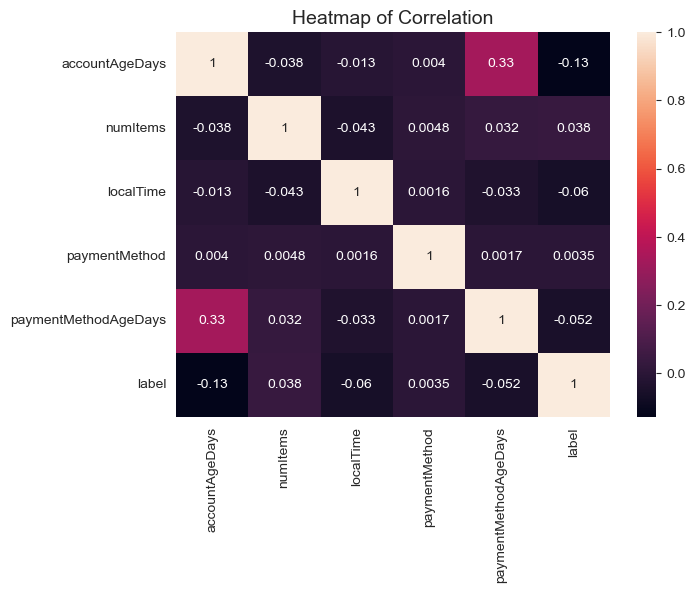

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
accountAgeDays,1.000000,-0.037562,-0.012600,0.004047,0.330909,-0.128098
numItems,-0.037562,1.000000,-0.042563,0.004762,0.031683,0.038116
localTime,-0.012600,-0.042563,1.000000,0.001568,-0.033076,-0.059505
paymentMethod,0.004047,0.004762,0.001568,1.000000,0.001731,0.003533
paymentMethodAgeDays,0.330909,0.031683,-0.033076,0.001731,1.000000,-0.052047
label,-0.128098,0.038116,-0.059505,0.003533,-0.052047,1.000000


In [129]:
#heat map for correlation
plt.figure(figsize=(7,5))
sns.heatmap(df.corr() , annot=True)
plt.title(label="Heatmap of Correlation",fontsize=14)
plt.show()
df.corr()

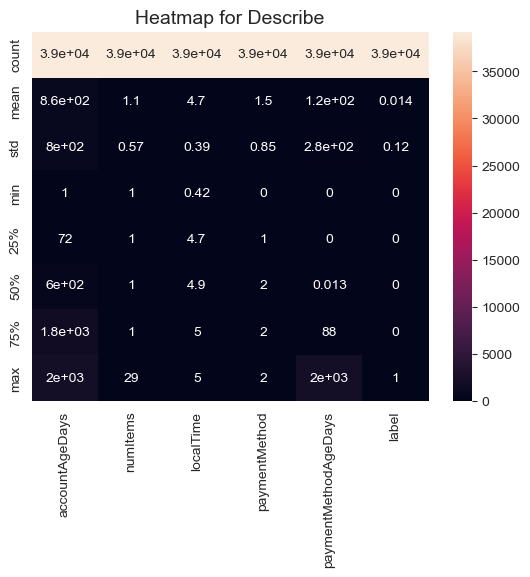

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
count,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,857.563984,1.084751,4.748232,1.476811,122.641326,0.014278
std,804.788212,0.566899,0.389360,0.850805,283.569177,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000,0.000000
25%,72.000000,1.000000,4.742303,1.000000,0.000000,0.000000
50%,603.000000,1.000000,4.886641,2.000000,0.012500,0.000000
75%,1804.000000,1.000000,4.962055,2.000000,87.510417,0.000000
max,2000.000000,29.000000,5.040929,2.000000,1999.580556,1.000000


In [135]:
#heatmap for describe
sns.heatmap(df.describe() , annot=True)
plt.title(label="Heatmap for Describe",fontsize=14)
plt.show()
df.describe()

### Machine Learning ###

In [142]:
#splitting dependent and independent features
x = df.iloc[:,:-1].values
y = df.iloc[: , -1].values
print(x)
print(y)

[[2.90000000e+01 1.00000000e+00 4.74540200e+00 0.00000000e+00
  2.82048611e+01]
 [7.25000000e+02 1.00000000e+00 4.74230300e+00 1.00000000e+00
  0.00000000e+00]
 [8.45000000e+02 1.00000000e+00 4.92131800e+00 2.00000000e+00
  0.00000000e+00]
 ...
 [1.59100000e+03 1.00000000e+00 4.74230300e+00 2.00000000e+00
  0.00000000e+00]
 [2.37000000e+02 1.00000000e+00 4.92131800e+00 2.00000000e+00
  2.36082639e+02]
 [2.72000000e+02 1.00000000e+00 5.04092900e+00 0.00000000e+00
  6.94444444e-04]]
[0 0 0 ... 0 0 0]


In [144]:
#standardizing independ features
sc = StandardScaler()
X = sc.fit_transform(x)
print(X)

[[-1.02955602 -0.14950045 -0.00726753 -1.73580247 -0.33303221]
 [-0.16472119 -0.14950045 -0.01522685 -0.56043027 -0.43249725]
 [-0.01561174 -0.14950045  0.44454619  0.61494193 -0.43249725]
 ...
 [ 0.91135202 -0.14950045 -0.01522685  0.61494193 -0.43249725]
 [-0.77109963 -0.14950045  0.44454619  0.61494193  0.40005321]
 [-0.72760938 -0.14950045  0.75174901 -1.73580247 -0.4324948 ]]


In [146]:
#splitting into train and test data sets
x_train , x_test , y_train , y_test = train_test_split(X , y, test_size=0.25 , random_state=12)
print("x_train shape : " , x_train.shape)
print("y_train shape : ", y_train.shape)
print("x_test shape : ", x_test.shape)
print("y_test shape : ", y_test.shape)

x_train shape :  (29415, 5)
y_train shape :  (29415,)
x_test shape :  (9806, 5)
y_test shape :  (9806,)


In [150]:
#LogisticRegression Model
lg = LogisticRegression()
lg.fit(x_train , y_train)
y_pred = lg.predict(x_test)

--------------------------------------Accuracy Score-------------------------------------------
0.9847032429125026
--------------------------------------Confusion Matrix-------------------------------------------
[[9656    2]
 [ 148    0]]
--------------------------------------Heatmap of confusion matrix-------------------------------------------


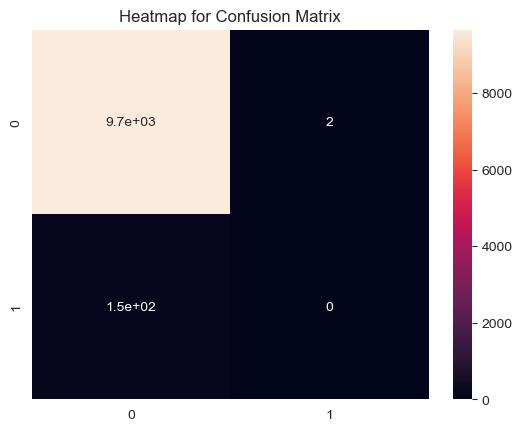

In [152]:
print("--------------------------------------Accuracy Score-------------------------------------------")
print(accuracy_score(y_test , y_pred))
print("--------------------------------------Confusion Matrix-------------------------------------------")
print(confusion_matrix(y_test , y_pred))
print("--------------------------------------Heatmap of confusion matrix-------------------------------------------")
sns.heatmap(confusion_matrix(y_test , y_pred) , annot=True)
plt.title("Heatmap for Confusion Matrix")
plt.show()

In [160]:
print("--------------------------------------Classification Report-------------------------------------------")
print(classification_report(y_test,y_pred))


--------------------------------------Classification Report-------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9658
           1       0.00      0.00      0.00       148

    accuracy                           0.98      9806
   macro avg       0.49      0.50      0.50      9806
weighted avg       0.97      0.98      0.98      9806



--------------------------------------HeatMap for Classification Report-------------------------------------------
{'0': {'precision': 0.9849041207670338, 'recall': 0.999792917788362, 'f1-score': 0.992292672901038, 'support': 9658.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 148.0}, 'accuracy': 0.9847032429125026, 'macro avg': {'precision': 0.4924520603835169, 'recall': 0.499896458894181, 'f1-score': 0.496146336450519, 'support': 9806.0}, 'weighted avg': {'precision': 0.9700391595317166, 'recall': 0.9847032429125026, 'f1-score': 0.9773161977236615, 'support': 9806.0}}
                     0      1  accuracy    macro avg  weighted avg
precision     0.984904    0.0  0.984703     0.492452      0.970039
recall        0.999793    0.0  0.984703     0.499896      0.984703
f1-score      0.992293    0.0  0.984703     0.496146      0.977316
support    9658.000000  148.0  0.984703  9806.000000   9806.000000
              precision    recall  f1-score      support
0      

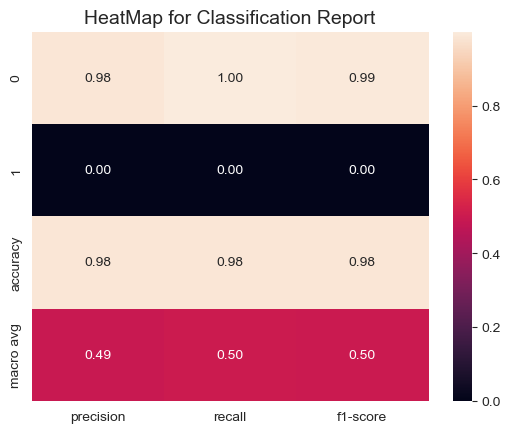

In [172]:
print("--------------------------------------HeatMap for Classification Report-------------------------------------------")
report = classification_report(y_test , y_pred , output_dict=True)
print(report)
report_df = pd.DataFrame(report)
print(report_df)
report_final = report_df.transpose()
print(report_final)

sns.heatmap(report_final.iloc[:-1 , :-1] , annot=True , fmt = ".2f" , cbar=True)
plt.title("HeatMap for Classification Report",fontsize=14)
plt.show()

In [ ]:
pd.DataFrame({'Actual': y_test,  'Predicted': y_pred}).head(50)